<a href="https://colab.research.google.com/github/achref-2/Machine-learning/blob/project-2/wifi_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler


In [ ]:
df=pd.read_csv("test.csv")

In [ ]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


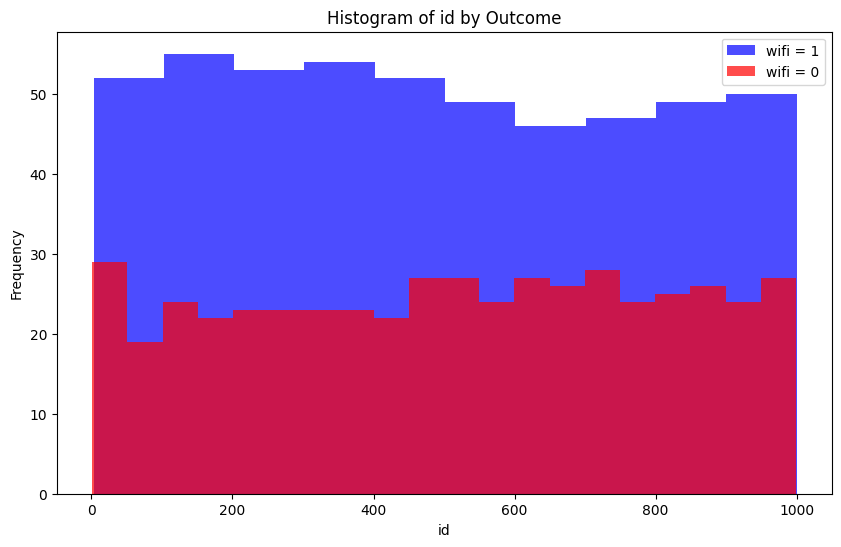

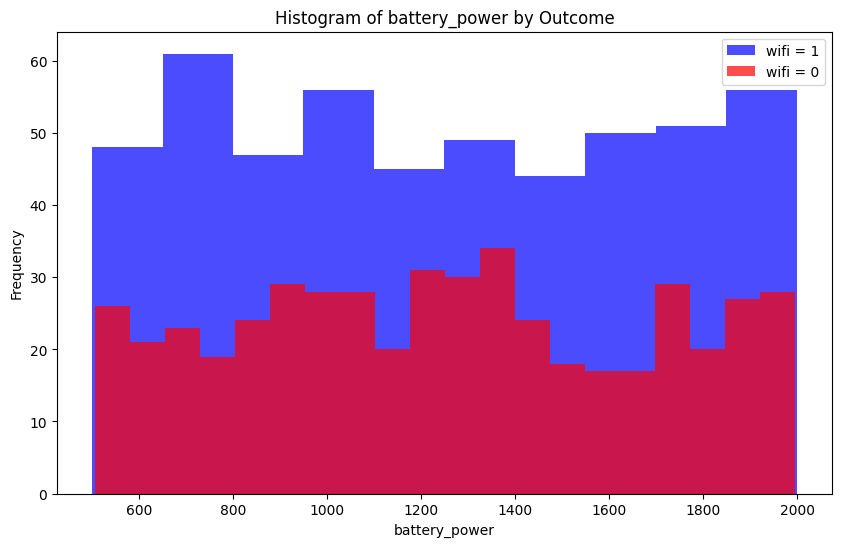

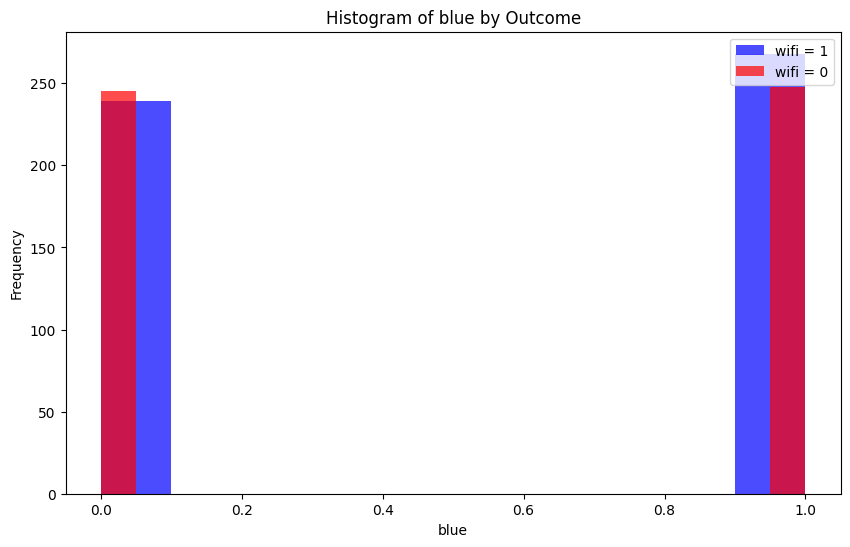

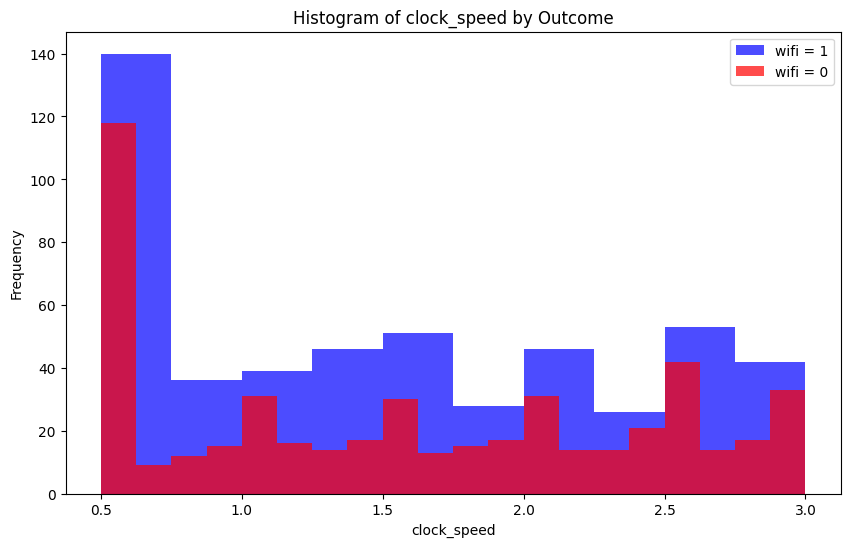

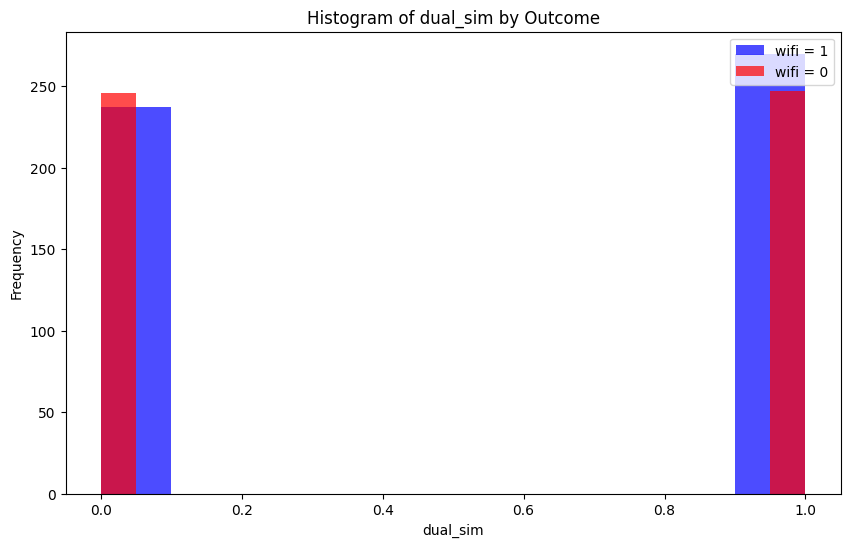

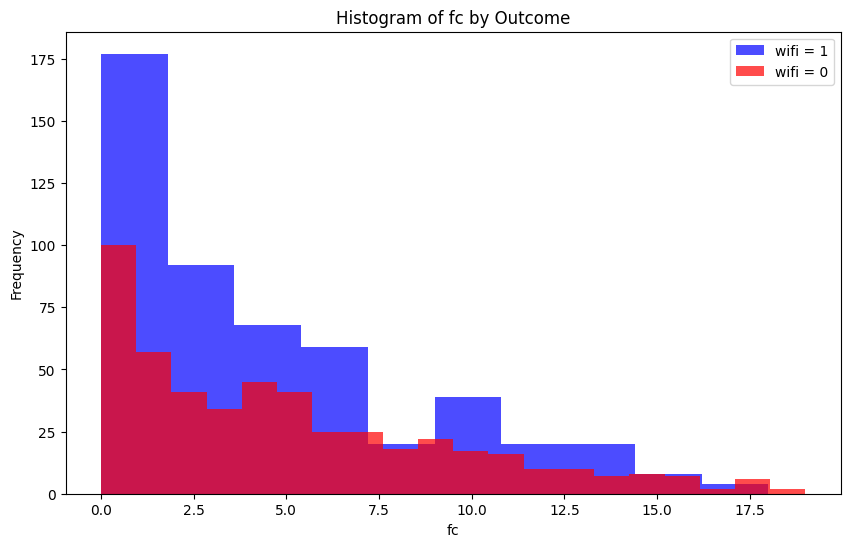

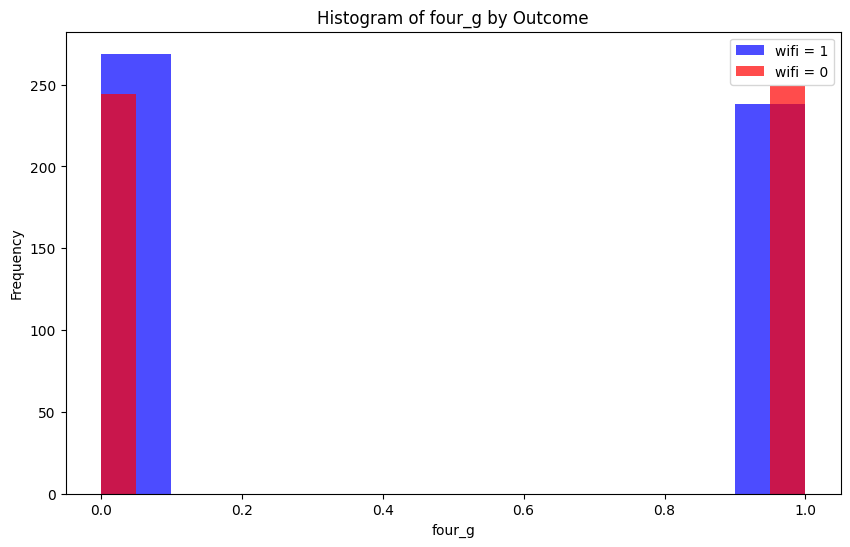

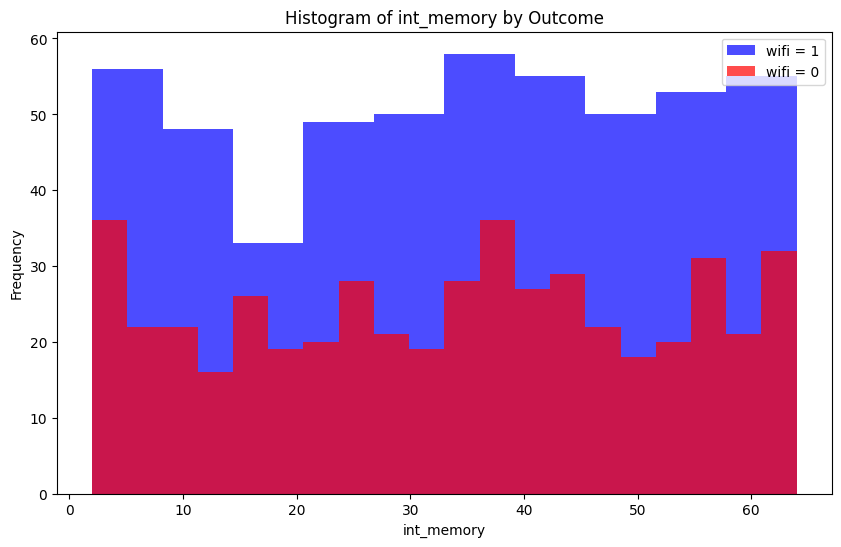

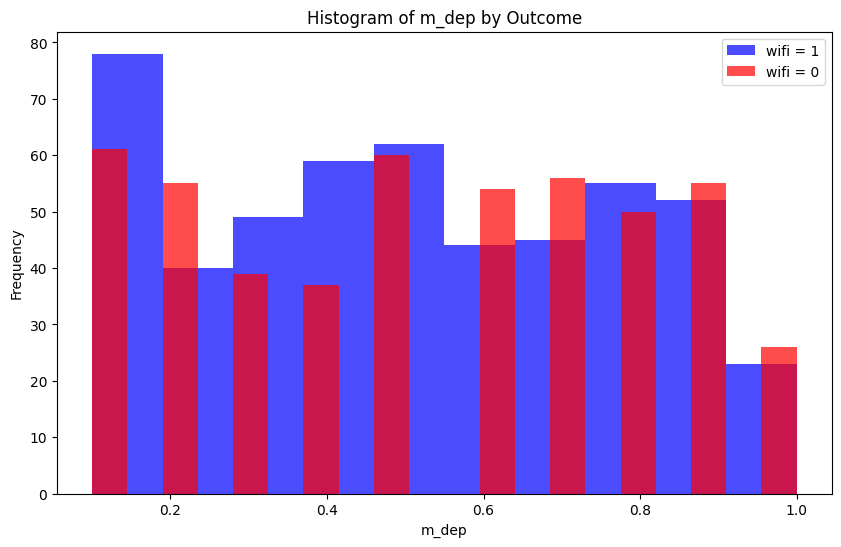

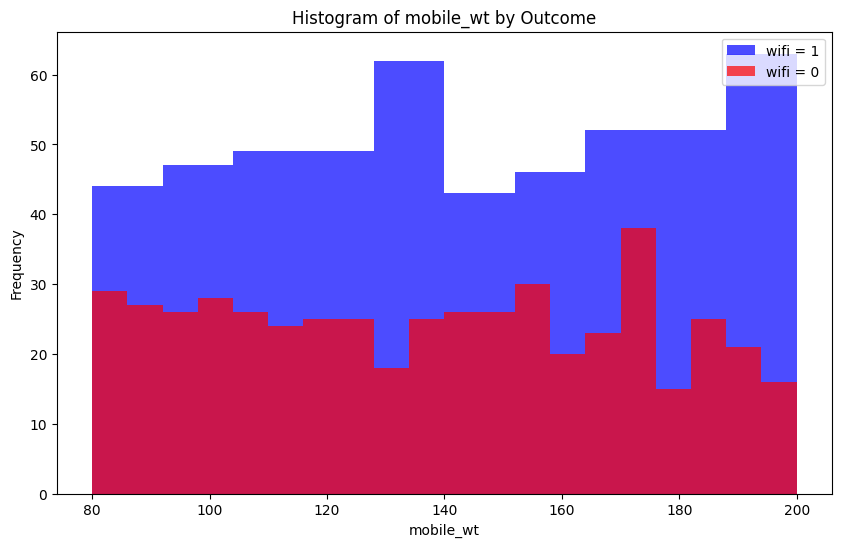

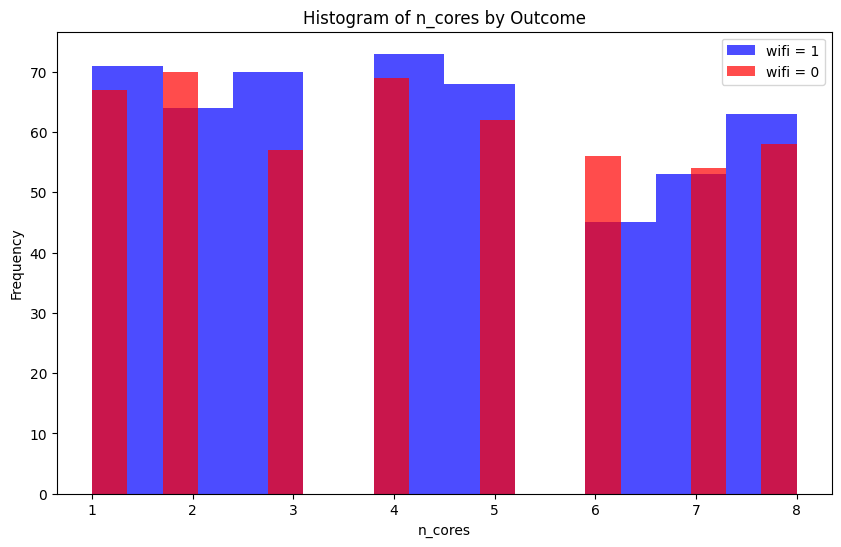

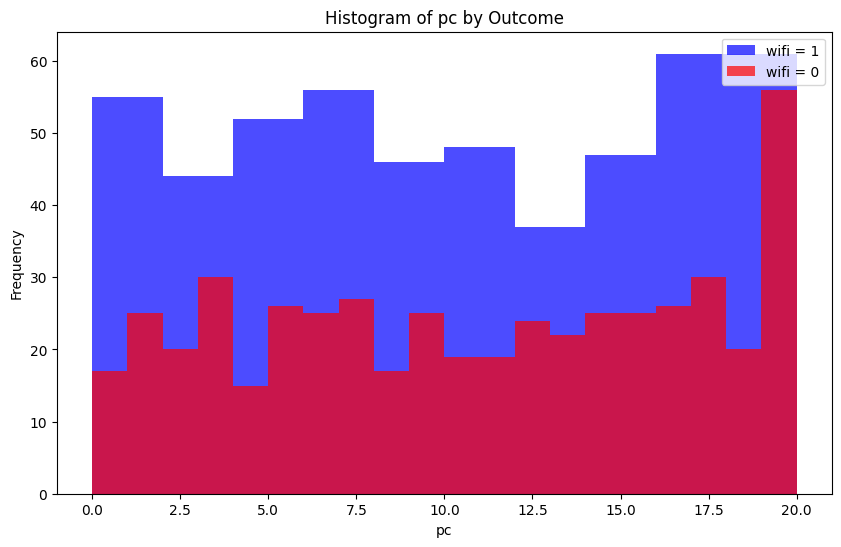

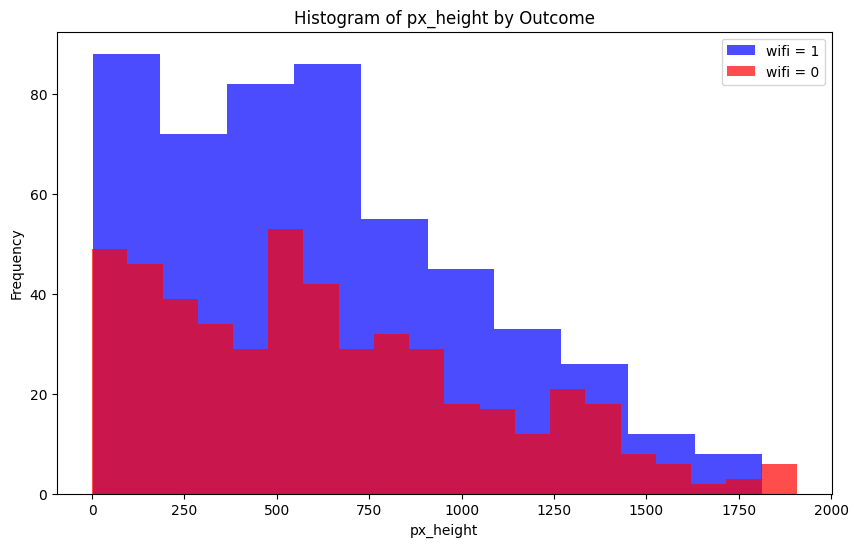

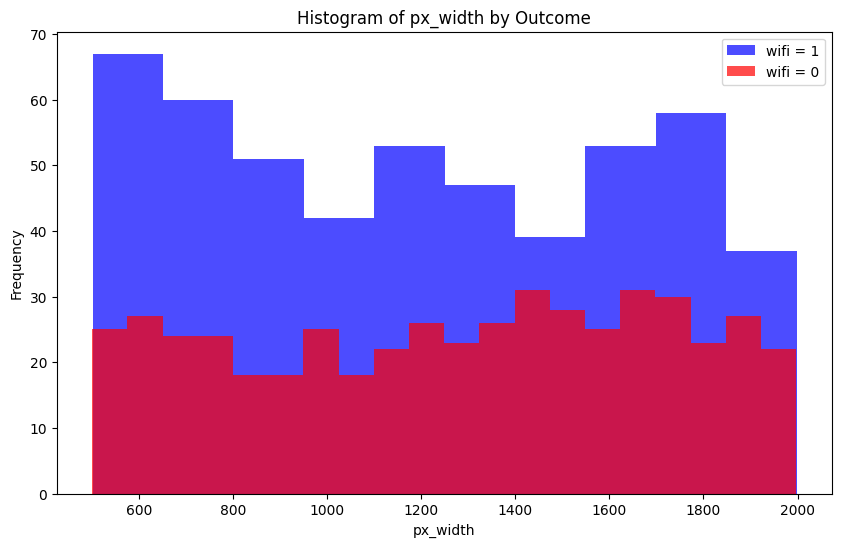

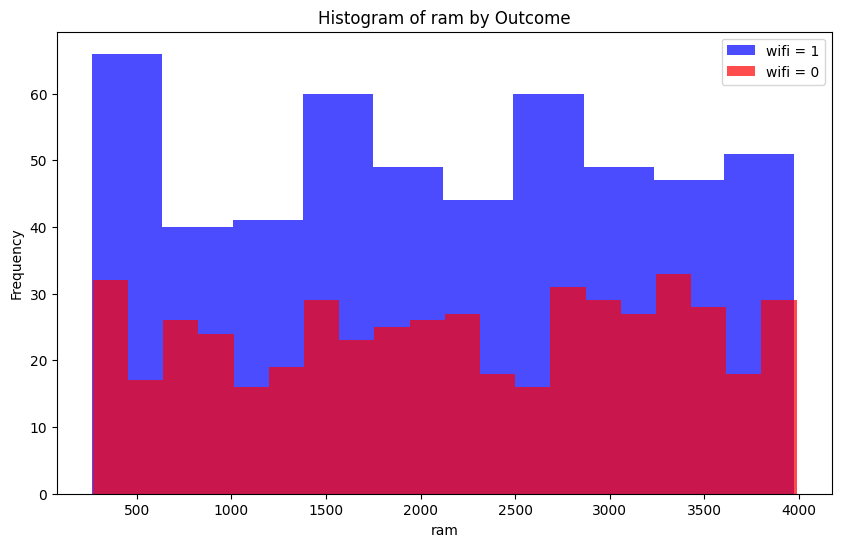

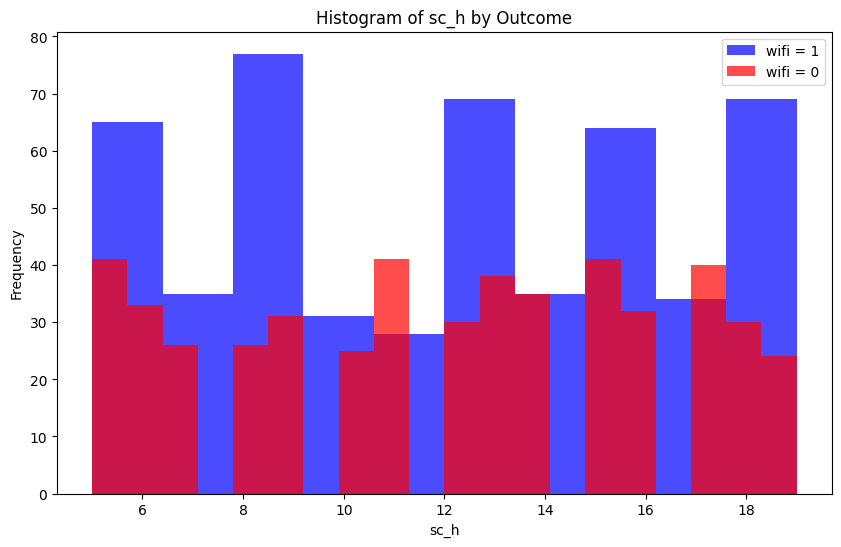

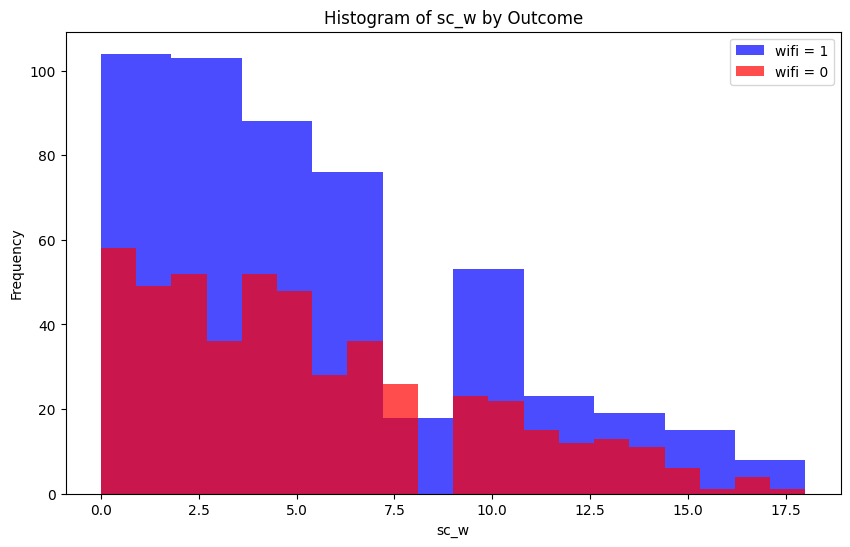

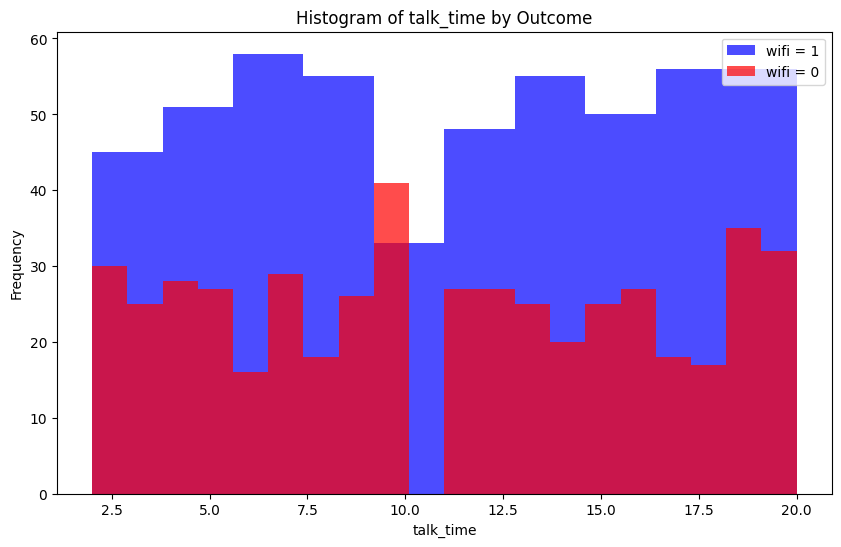

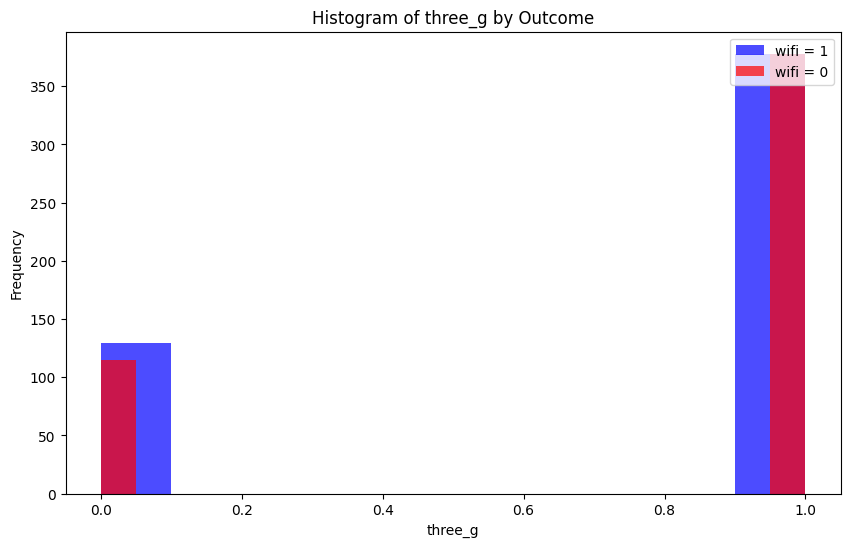

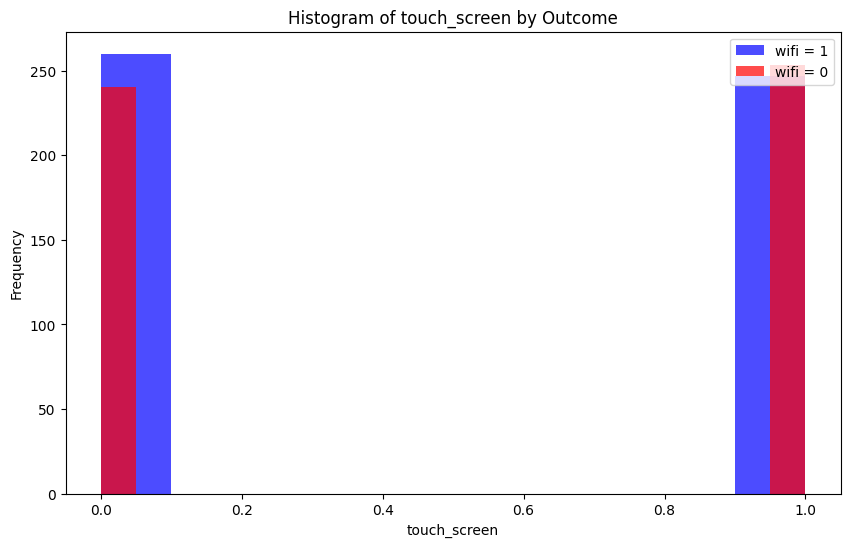

In [ ]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]

    # Create a figure
    plt.figure(figsize=(10, 6))

    # Plot histogram for Outcome == 1
    plt.hist(df[df['wifi'] == 1][label], color='blue', alpha=0.7, label='wifi = 1', bins=10)

    # Plot histogram for Outcome == 0
    plt.hist(df[df['wifi'] == 0][label], color='red', alpha=0.7, label='wifi = 0', bins=20)
    # Add title and labels
    plt.title(f'Histogram of {label} by Outcome')
    plt.xlabel(label)
    plt.ylabel('Frequency')

    # Add legend
    plt.legend(loc='upper right')

    # Show plot
    plt.show()

In [ ]:
print(len(df[df['wifi'] == 1][label]),len(df[df['wifi'] == 0][label]))

507 493


In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1,1))))#to make it in one dimention
transformed_df = pd.DataFrame(data,columns=df.columns)

In [ ]:
over = RandomOverSampler()
x, y = over.fit_resample(x , y)
data = np.hstack((x, np.reshape(y, (-1,1))))#to make it in one dimention
transformed_df = pd.DataFrame(data,columns=df.columns)

In [ ]:
print(len(transformed_df[transformed_df['wifi'] == 1][label]),len(transformed_df[transformed_df['wifi'] == 0][label]))

507 507


In [ ]:
x_train, x_temp , y_train , y_temp = train_test_split(x , y, test_size=0.4, random_state=0)
x_valid, x_test , y_valid , y_test = train_test_split(x_temp , y_temp, test_size=0.5, random_state=0)



In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),#if x <= 0 --> 0, x > 0 -->x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile a model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=['accuracy']
              )


In [ ]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.4671


[0.23692116141319275, 0.46710526943206787]

In [ ]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.4778


[0.2362360656261444, 0.47783252596855164]

In [ ]:
#train a model
model.fit(x_train, y_train , batch_size=16 , epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 8ms/step - loss: 0.2019 - accuracy: 0.5049 - val_loss: 0.1978 - val_accuracy: 0.4975
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.5280 - val_loss: 0.1931 - val_accuracy: 0.4778
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.5247 - val_loss: 0.1907 - val_accuracy: 0.4680
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.5312 - val_loss: 0.1895 - val_accuracy: 0.4778
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.5444 - val_loss: 0.1889 - val_accuracy: 0.4532
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.5576 - val_loss: 0.1879 - val_accuracy: 0.4877
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.5658 - val_loss: 0.1879 - val_accuracy: 0.4532
Epoch 8/20
38/38 [==

In [ ]:
model.save('my_model.h5')

In [ ]:
# Step 7: Evaluate and make predictions
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

NameError: name 'X_test' is not defined

In [ ]:
predictions = model.predict(y_test)
predictions = (predictions > 0.5).astype(int)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None
